In [60]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
import warnings

warnings.filterwarnings("ignore")

list = []


def random_select(param_range):
    if len(list) == 0:
        while len(list) <= 30:
            r = random.randint(param_range[0], param_range[1])
            if r not in list: list.append(r)
        list.sort()
    return list


def RandomSearchCV(x_train, y_train, classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    params = random_select(param_range)
    x_train_chunks = np.array_split(x_train, folds)
    y_train_chunks = np.array_split(y_train, folds)
    train_accuracy_mean = []
    test_accuracy_mean = []
    for each_k in params:
        train_accuracy = []
        test_accuracy = []
        for index in range(0, len(x_train_chunks)):
            x_test = x_train_chunks[index]
            y_test = y_train_chunks[index]
            X_train = np.zeros((1, x_train.shape[1]))
            Y_train = np.zeros((1, 1))
            for index_2 in range(0, len(x_train_chunks)):
                if index != index_2:
                    X_train = np.vstack((X_train, x_train_chunks[index_2]))
                    Y_train = np.vstack((Y_train, y_train_chunks[index_2]))
            X_train = np.delete(X_train, (0), axis=0)
            Y_train = np.delete(Y_train, (0), axis=0)
            classifier.n_neighbors = each_k
            classifier.fit(X_train, Y_train)
            train_accuracy.append(accuracy_score(y_train, classifier.predict(x_train)))
            test_accuracy.append(accuracy_score(y_test, classifier.predict(x_test)))
        train_accuracy_mean.append(np.mean(train_accuracy))
        test_accuracy_mean.append(np.mean(test_accuracy))
    return test_accuracy_mean, train_accuracy_mean


x, y = make_classification(n_samples=10000, n_features=2, n_classes=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=60)
classifier = KNeighborsClassifier()
range_num = (30, 250)
test_acc, train_acc = RandomSearchCV(x, y.reshape(-1, 1), classifier, range_num, 4)
k_values = random_select(range_num)


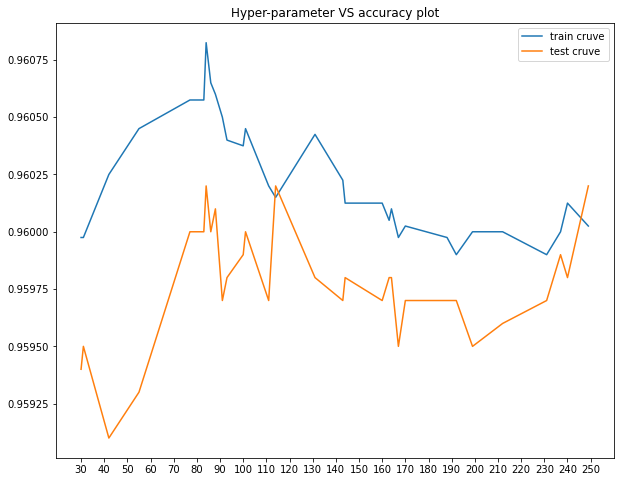

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize =(10, 8))
plt.plot(k_values,train_acc, label='train cruve')
plt.plot(k_values,test_acc, label='test cruve')
plt.xticks(np.linspace(30,250,23))
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

### Choosing K value as 174 and plotting decision boundary


In [62]:
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

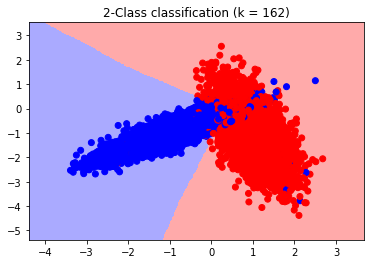

In [63]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 162)
neigh.fit(x, y)
plot_decision_boundary(x[:, 0], x[:, 1], y, neigh)